# Install Dependencies

In [2]:
!pwd

/home/younis/century-health


In [63]:
!pip install pandas
!pip install great_expectations
!pip install pyarrow
!pip install fastparquet
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 5.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)


# Data Assessment

## Read data

In [6]:
!ls data/

conditions.xlsx     medications.csv  symptoms.csv
encounters.parquet  patients.csv


In [1]:
import great_expectations as gx

In [3]:
df_patients = gx.read_csv("airflow/data/patients.csv")
df_patients.head(3)

,PATIENT_ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,54f1059e-6250-3949-6dd0-1dda9b85d22a,2002-01-21,NaN,999-28-3364,S99987398,X44428214X,Ms.,Fredricka415,Crist667,NaN,...,Fort Worth,Texas,Tarrant County,48439.0,76104,0.329154,-97.399553,9990.08,0.0,35460
1,92675303-ca5b-136a-169b-e764c5753f06,1997-04-16,NaN,999-62-9859,S99999770,X75016560X,Mr.,Lorenzo669,Urrutia540,NaN,...,Arlington,Texas,Tarrant County,48439.0,76006,0.328145,-97.068885,10936.80,0.0,88407
2,a0b63e97-b6fd-5fe1-8f2d-2bec915efa97,1993-02-04,NaN,999-53-6488,S99979170,X60079936X,Mr.,Luther918,MacGyver246,NaN,...,Houston,Texas,Harris County,48339.0,77357,0.300834,-95.649706,10662.16,0.0,41800


In [7]:
df_patients.columns

Index(['PATIENT_ID', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'FIPS', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'INCOME'],
      dtype='object')

In [35]:
df_conditions = gx.read_excel("airflow/data/conditions.xlsx")
df_conditions.head(3)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2020-04-21,NaN,28D7B56C-6056-D0A2-2991-39D6E917216C,402dfaeb-1888-f562-4651-f75203eb1e28,200936003,Lupus erythematosus
1,2001-11-07,NaN,239AE86A-96DB-6211-9042-D3F2850AABB8,10d39d6f-7d98-8d03-8866-0a7cd363890b,200936003,Lupus erythematosus
2,2001-11-07,NaN,239AE86A-96DB-6211-9042-D3F2850AABB8,10d39d6f-7d98-8d03-8866-0a7cd363890b,271737000,Anemia (disorder)


In [19]:
df_conditions.columns

Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')

In [4]:
df_encounters = gx.read_parquet("airflow/data/encounters.parquet")
df_encounters.head(3)

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,6539c675-dcf2-cace-a90d-7f097d1799b3,2014-02-10T11:00:08Z,2014-02-10T11:15:08Z,54F1059E-6250-3949-6DD0-1DDA9B85D22A,ef42ec52-a1c1-3fc5-8e52-da46f7f3970c,35088bec-f756-35d8-8140-b2b017c0eacc,8fa6c185-e44e-3e34-8bd8-39be8694f4ce,wellness,410620009,Well child visit (procedure),133.36,405.36,0.0,NaN,None
1,748a443c-9819-4f3a-8648-0096ace6d3fd,2014-06-04T05:19:43Z,2014-06-04T05:34:43Z,92675303-CA5B-136A-169B-E764C5753F06,02078b23-a943-3175-b5f0-8d386dd8eb56,af22b73b-d38f-3d92-8a95-bd57ac2dc3f1,b046940f-1664-3047-bca7-dfa76be352a4,wellness,410620009,Well child visit (procedure),133.36,269.36,0.0,NaN,None
2,678e03b1-21ac-fbfa-3506-17bee72a6335,2015-06-10T05:19:43Z,2015-06-10T05:34:43Z,92675303-CA5B-136A-169B-E764C5753F06,02078b23-a943-3175-b5f0-8d386dd8eb56,af22b73b-d38f-3d92-8a95-bd57ac2dc3f1,b046940f-1664-3047-bca7-dfa76be352a4,wellness,162673000,General examination of patient (procedure),133.36,269.36,0.0,NaN,None


In [27]:
df_encounters.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')

In [5]:
df_medications = gx.read_csv("airflow/data/medications.csv")
df_medications.head(3)

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2020-04-22T02:47:09Z,NaN,28d7b56c-6056-d0a2-2991-39d6e917216c,0133f751-9229-3cfd-815f-b6d4979bdd6a,402DFAEB-1888-F562-4651-F75203EB1E28,849574,Naproxen sodium 220 MG Oral Tablet,274.28,0.0,45,12342.60,200936003.0,Lupus erythematosus
1,2020-04-22T02:47:09Z,2020-05-17T02:47:09Z,28d7b56c-6056-d0a2-2991-39d6e917216c,0133f751-9229-3cfd-815f-b6d4979bdd6a,402DFAEB-1888-F562-4651-F75203EB1E28,312615,predniSONE 20 MG Oral Tablet,16.04,0.0,1,16.04,200936003.0,Lupus erythematosus
2,2021-08-01T02:47:09Z,2021-08-15T02:47:09Z,28d7b56c-6056-d0a2-2991-39d6e917216c,0133f751-9229-3cfd-815f-b6d4979bdd6a,FBC2F3B3-AB93-707E-AD9E-337990345F32,241834,cycloSPORINE modified 100 MG Oral Capsule,473.61,0.0,1,473.61,200936003.0,Lupus erythematosus


In [29]:
df_medications.columns

Index(['START', 'STOP', 'PATIENT', 'PAYER', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'BASE_COST', 'PAYER_COVERAGE', 'DISPENSES', 'TOTALCOST', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')

In [6]:
df_symptoms = gx.read_csv("airflow/data/symptoms.csv")
df_symptoms.head(3)

,PATIENT,GENDER,RACE,ETHNICITY,AGE_BEGIN,AGE_END,PATHOLOGY,NUM_SYMPTOMS,SYMPTOMS
0,28d7b56c-6056-d0a2-2991-39d6e917216c,NaN,white,hispanic,26,NaN,Lupus erythematosus,4,Rash:34;Joint Pain:39;Fatigue:9;Fever:12
1,6c434506-fb4b-3e3f-c19d-553dec3b6c17,NaN,black,hispanic,58,NaN,Lupus erythematosus,4,Rash:19;Joint Pain:44;Fatigue:48;Fever:15
2,44a8ca45-6c6e-38bb-fac0-ddbf7a7ee3a4,NaN,white,nonhispanic,50,NaN,Lupus erythematosus,4,Rash:2;Joint Pain:32;Fatigue:12;Fever:6


In [31]:
df_symptoms.columns

Index(['PATIENT', 'GENDER', 'RACE', 'ETHNICITY', 'AGE_BEGIN', 'AGE_END',
       'PATHOLOGY', 'NUM_SYMPTOMS', 'SYMPTOMS'],
      dtype='object')

## EDA and Data Validation using Great Expectations

In [57]:
"""
    We have 5 datasets in five different data frames
        df_patients
        df_conditions
        df_encounters
        df_medications
        df_symptoms
    
    Please note I am doing EDA and Data Validation on df_patients only. The same mechanism can be used for other four data sets,
    though there will be a little difference in implementation but the core concept remains same
"""

'\n    We have 5 datasets in five different data frames\n        df_patients\n        df_conditions\n        df_encounters\n        df_medications\n        df_symptoms\n    \n    Please note I am doing EDA and Data Validation on df_patients only. The same mechanism can be used for other four data sets. \n'

### EDA on patients data

In [38]:
# check data types non null counts of each column
df_patients.info()

<class 'great_expectations.dataset.pandas_dataset.PandasDataset'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PATIENT_ID           10000 non-null  object 
 1   BIRTHDATE            10000 non-null  object 
 2   DEATHDATE            0 non-null      float64
 3   SSN                  10000 non-null  object 
 4   DRIVERS              7680 non-null   object 
 5   PASSPORT             7039 non-null   object 
 6   PREFIX               7337 non-null   object 
 7   FIRST                10000 non-null  object 
 8   LAST                 10000 non-null  object 
 9   SUFFIX               59 non-null     object 
 10  MAIDEN               2352 non-null   object 
 11  MARITAL              5854 non-null   object 
 12  RACE                 10000 non-null  object 
 13  ETHNICITY            10000 non-null  object 
 14  GENDER               0 non-null      float64
 15  BIRTHPLAC

In [43]:
# Check the statistical summary though it is usable on a few cols like INCOME, HEALTHCARE_COVERAGE.
print(df_patients.describe())

# We can get statistics data frame of usable cols into another dataframe
df_stat_patients = df_patients.describe()[['HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']]
print(df_stat_patients)


       DEATHDATE  GENDER          FIPS           ZIP           LAT  \
count        0.0     0.0   9710.000000  10000.000000  10000.000000   
mean         NaN     NaN  48188.824717  74947.406200      0.309868   
std          NaN     NaN    690.565166  13036.344689      0.020044   
min          NaN     NaN  35013.000000      0.000000      0.258876   
25%          NaN     NaN  48113.000000  75904.000000      0.296555   
50%          NaN     NaN  48201.000000  77099.000000      0.306608   
75%          NaN     NaN  48355.000000  78260.000000      0.327973   
max          NaN     NaN  48507.000000  88063.000000      0.365969   

                LON  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE        INCOME  
count  10000.000000         10000.000000         10000.000000   10000.00000  
mean     -97.548956         10489.406391          1817.903496   85358.40780  
std        2.438536          5256.509164          2462.371193  141329.22638  
min     -106.646755           100.000000             0.00

In [50]:
# Check for missing values on each column
print(df_patients.isnull().sum())

# Check for missing values for a perticular column. 
#I am choosing PATIENE_ID because if i use any open RDBMS like postgressql then I have make sure PATIENE_ID is not null
print(df_patients['PATIENT_ID'].isnull().sum())

PATIENT_ID                 0
BIRTHDATE                  0
DEATHDATE              10000
SSN                        0
DRIVERS                 2320
PASSPORT                2961
PREFIX                  2663
FIRST                      0
LAST                       0
SUFFIX                  9941
MAIDEN                  7648
MARITAL                 4146
RACE                       0
ETHNICITY                  0
GENDER                 10000
BIRTHPLACE                 0
ADDRESS                    0
CITY                       0
STATE                      0
COUNTY                     0
FIPS                     290
ZIP                        0
LAT                        0
LON                        0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
INCOME                     0
dtype: int64
0


In [53]:
# Check for duplicates for a perticular column 
# Again I am chosing PATIENT_ID because if i use any open RDBMS like postgressql then I have make sure PATIENE_ID is unique
print(df_patients['PATIENT_ID'].duplicated().sum())

0


In [56]:
# Check uniqueness in categorical cols
# The output suggests that GENDER col has null values
print(df_patients['GENDER'].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
"""
    Issues found after performing basic level of EDA on Patients data
        a. type of DEATHDATE and GENDER is float64 and the type of DEATHDATE and GENDER should be data and string respectively
        b. Many columns like DRIVER, and PASPORT have null values, though it is acceptable.
        c. GENDER col has null values, though it not not a key and not linked to other tables but it the data incorectness.
        d. Data type of INCOME feature is int that should have been float
        e. there is no PK in Symptoms (Observations)
    
    WE can found similar or other type of issues in other data sets when we perform EDA on them. 
"""

<Axes: >

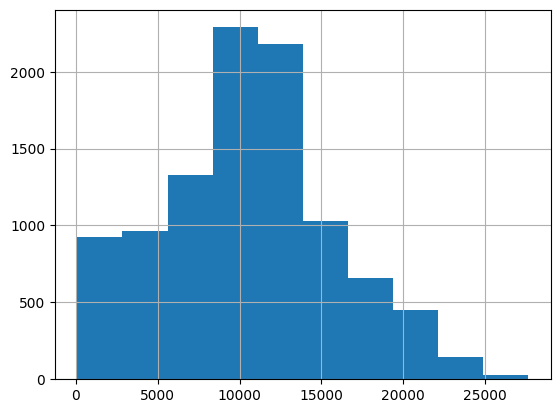

In [66]:
# We can aslo do the basis level of plotting to visualize the data

import matplotlib.pyplot as plt

# The following flot shows the distribution of health care expenses of whole patients
df_patients['HEALTHCARE_EXPENSES'].hist()


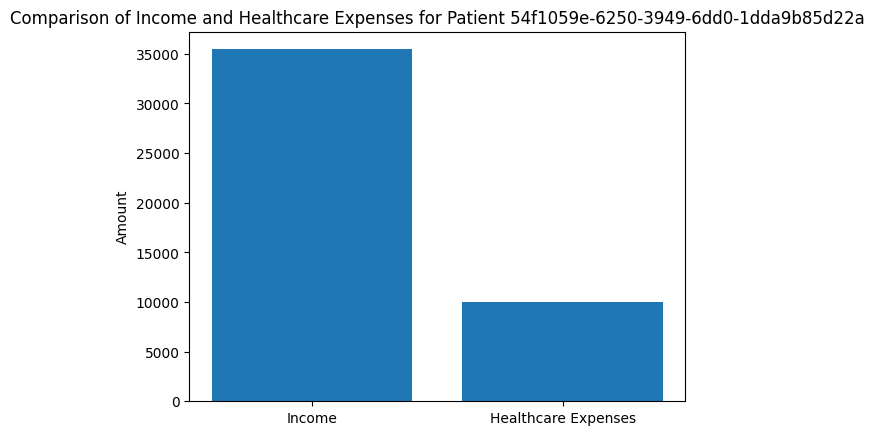

In [71]:
# compare the income and healthcare expenses of a perticular patient

# Filter out the data of perticualar patient
patient_id = "54f1059e-6250-3949-6dd0-1dda9b85d22a"
pat_data = df_patients[df_patients['PATIENT_ID'] == patient_id]
# print(pat_data)

income = pat_data['INCOME'].values[0]
healthcare_expenses = pat_data['HEALTHCARE_EXPENSES'].values[0]

# Create a bar plot to compare income and healthcare expenses
fig, ax = plt.subplots()
ax.bar(['Income', 'Healthcare Expenses'], [income, healthcare_expenses])
ax.set_ylabel('Amount')
ax.set_title('Comparison of Income and Healthcare Expenses for Patient ' + patient_id)
plt.show()

### Define and Check data corectness on patients data using great expectations

In [89]:
df_patients.columns

Index(['PATIENT_ID', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'FIPS', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'INCOME'],
      dtype='object')

In [102]:
df_patients["HEALTHCARE_EXPENSES"]

0        9990.08
1       10936.80
2       10662.16
3       11455.93
4       12449.11
          ...   
9995    14358.74
9996    18605.74
9997    10632.01
9998    11431.06
9999    19529.91
Name: HEALTHCARE_EXPENSES, Length: 10000, dtype: float64

In [77]:
# Defnine Uniqueness expectation on PATIENT_ID as it is PK
df_patients.expect_column_values_to_be_unique("PATIENT_ID")

{
  "success": true,
  "result": {
    "element_count": 10000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [87]:
# GENDER column should have three categorical values and it should be not null

df_patients.expect_column_values_to_be_in_set("GENDER", ["Male", "Female", "Other"])
df_patients.expect_column_values_to_not_be_null("GENDER")

{
  "success": false,
  "result": {
    "element_count": 10000,
    "unexpected_count": 10000,
    "unexpected_percent": 100.0,
    "unexpected_percent_total": 100.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [98]:
# Type of zip should be int and it should be a 5-digit number

df_patients.expect_column_values_to_be_of_type("ZIP", 'int64')
df_patients.expect_column_values_to_match_regex("ZIP", r"^\d{5}$")

{
  "success": false,
  "result": {
    "element_count": 10000,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 290,
    "unexpected_percent": 2.9000000000000004,
    "unexpected_percent_total": 2.9000000000000004,
    "unexpected_percent_nonmissing": 2.9000000000000004,
    "partial_unexpected_list": [
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0,
      0
    ]
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [104]:
# Columns HEALTHCARE_EXPENSES, HEALTHCARE_COVERAGE, and INCOME should be float
df_patients.expect_column_values_to_be_of_type("HEALTHCARE_EXPENSES", 'float64')
df_patients.expect_column_values_to_be_of_type("HEALTHCARE_COVERAGE", 'float64')
df_patients.expect_column_values_to_be_of_type("INCOME", 'float64')

{
  "success": false,
  "result": {
    "observed_value": "int64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [124]:
# Manipulate and save json expectations of patient data
import json

# Create an expectation suite from the dataframe
suite = df_patients.get_expectation_suite()
# print(suite)

suite.expectation_suite_name = 'patients'

patient_expections = suite.to_json_dict()
print(patient_expections)

# Save the json in gx project and then update yaml file

file_path = "./gx/expectations/patients_ex_suite.json"
with open(file_path, "w") as f:
    json.dump(patient_expections, f)

{'expectation_suite_name': 'patients', 'ge_cloud_id': None, 'expectations': [{'expectation_type': 'expect_column_values_to_be_unique', 'kwargs': {'column': 'PATIENT_ID'}, 'meta': {}}, {'expectation_type': 'expect_column_distinct_values_to_be_in_set', 'kwargs': {'column': 'GENDER', 'value_set': ['Male', 'Female', 'Other']}, 'meta': {}}, {'expectation_type': 'expect_column_values_to_be_in_set', 'kwargs': {'column': 'GENDER', 'value_set': ['Male', 'Female', 'Other']}, 'meta': {}}, {'expectation_type': 'expect_column_values_to_be_of_type', 'kwargs': {'column': 'ZIP', 'type_': 'int64'}, 'meta': {}}, {'expectation_type': 'expect_column_values_to_be_of_type', 'kwargs': {'column': 'HEALTHCARE_EXPENSES', 'type_': 'float64'}, 'meta': {}}, {'expectation_type': 'expect_column_values_to_be_of_type', 'kwargs': {'column': 'HEALTHCARE_COVERAGE', 'type_': 'float64'}, 'meta': {}}], 'data_asset_type': 'Dataset', 'meta': {'great_expectations_version': '0.18.11'}}


In [127]:
# Validate Expectations

from great_expectations import read_json

# suite = read_json("./gx/expectations/patients_ex_suite.json")
result = df_patients.validate(expectation_suite=patient_expections)

print(result)

{
  "success": true,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "expectation_type": "expect_column_values_to_be_unique",
        "kwargs": {
          "column": "PATIENT_ID"
        },
        "meta": {}
      },
      "result": {
        "element_count": 10000,
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "unexpected_percent_nonmissing": 0.0,
        "partial_unexpected_list": []
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      }
    },
    {
      "success": true,
      "expectation_config": {
        "expectation_type": "expect_column_distinct_values_to_be_in_set",
        "kwargs": {
          "column": "GENDER",
          "value_set": [
            "Male",
            "Female",
            "Other"
   

# Data Analysis on Merged Data

In [60]:
# Read the merged data
import pandas as pd
import matplotlib.pyplot as plt
data = gx.read_csv("airflow/processed_data/merged_data.csv")
data.columns

Index(['patient_id', 'birth_date', 'death_date', 'first_name', 'last_name',
       'race', 'ethnicity', 'sex', 'address', 'city', 'state', 'county',
       'fips_code', 'zip_code', 'latitude', 'longitude', 'recorded_date',
       'resolved_date', 'encounter_id_x', 'source_code',
       'source_description_x', 'encounter_id_y', 'encounter_start_date',
       'encounter_end_date', 'attending_provider_id', 'encounter_type',
       'admit_source_code', 'admit_source_description', 'charge_amount',
       'allowed_amount', 'paid_amount', 'ms_drg_code', 'ms_drg_description',
       'dispensing_date', 'prescribing_date', 'encounter_id', 'medication_id',
       'source_description_y', 'practitioner_id', 'observation_id'],
      dtype='object')

In [52]:
# no of patients
num_distinct_patients = data['patient_id'].nunique()
print("Number of distinct patients:", num_distinct_patients)

Number of distinct patients: 10000


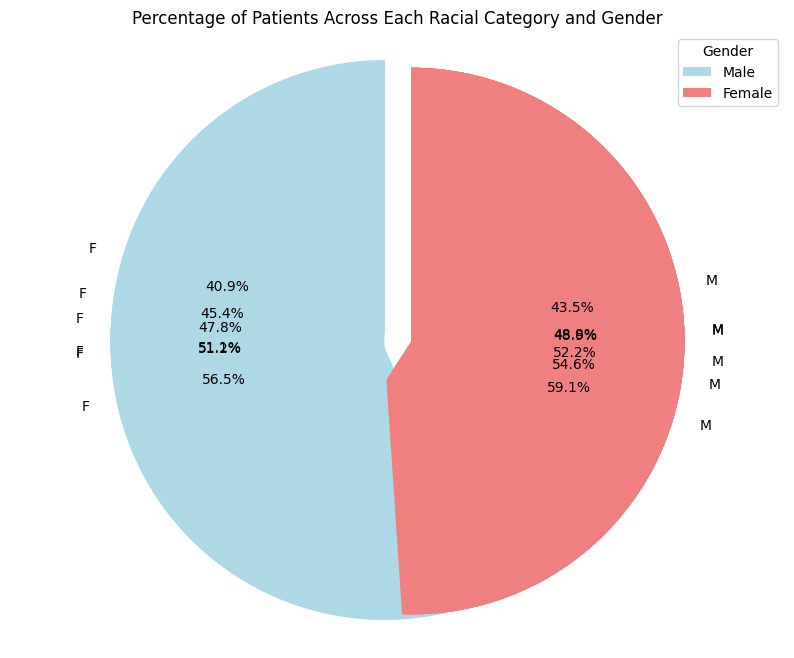

In [62]:
# pie chart indicating the percentage of patients across each racial category and gender

# Group by race and gender and count the number of patients
grouped_data = data.groupby(['race', 'sex']).size().reset_index(name='count')
pivot_table = grouped_data.pivot(index='race', columns='sex', values='count')
f
ig, ax = plt.subplots(figsize=(10, 8))
explode = (0.1, 0) 
colors = ['lightblue', 'lightcoral']

# Plot the pie chart
for index, row in pivot_table.iterrows():
    ax.pie(row, labels=row.index, startangle=90, colors=colors, explode=explode, autopct='%1.1f%%')

ax.set_title('Percentage of Patients Across Each Racial Category and Gender')
plt.axis('equal') 
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.show()
